# Final Project Analysis




<font size="5"> Introduction </font> 

Some questions you should try to answer:
What is the dataset about?
How many variables are there?
How many observations are there?

Data Description: identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 


The dataset explores a Minecraft server dataset from the Pacific Laboratory for Artificial Intelligence (a UBC research group) led by Frank Woods. Through recording play sessions from a controlled server, they collected data regarding the players' demographics and monitored their online and offline logs. This report analyzes data from the `players.csv` file.

It will try to answer the question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
game_data <- read_csv ("data/players.csv")
game_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


From the dataset above, it is shown that there are 7 variables, with names as follows:

- `experience` (character): the player's skill level (listed as either amateur, beginner, regular, pro, or veteran)
- `subscribe` (logical): if the player has subscribed to the game-related newsletter
- `hashedEmail`(character): the player's unique identifier
- `played_hours`(double): how many hours each player has played the game
- `names`(character): name of each player
- `gender`(character): gender of each player
- `Age`(double): age of each player

There are 196 rows corresponding to each player, meaning that there are 196 observations. 



<font size="5"> Methods </font> 

Try to answer these questions now:
Identify the main outcome/categorical/label variable in the dataset.

How many values/groups are in this variable?
How many observations are there in each value/group?




As the main question for this dataset is to see the player characteristics and behaviours that are most predictive of whether or not they have subscribed to the game-related newsletter, then `subscribe` would be the main categorical label (which we also need to convert into). This logical variable has only two possibilities: `TRUE` (that they have subscribed) or `FALSE` (that they are not subscribed to the newsletter).

From the given players.csv dataset, we know that only the `played_hours` and `Age` variables are qualitative, which is what we will be using in the recipes to determine if the player will have subscribed to the game-related newsletter going forward. However, as these variables fluctuate heavily in range, scaling is also necessary before we can determine the subscription classification. 

[...splitting 75%]

[5 fold...]

[setting seed....]


<font size="5"> Results </font> 

Make some visualizations of the outcome variable:

What does the distribution of the variable look like?
What relationship does it have with some of the other variables?
Tip: Try using a range of box plots, scatterplots, bar charts, line graphs, etc.

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3902573,3,0.08189538,Preprocessor1_Model01
2,accuracy,binary,0.3902573,3,0.08189538,Preprocessor1_Model02
3,accuracy,binary,0.4474001,3,0.05660941,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
18,accuracy,binary,0.7354132,3,0.012840587,Preprocessor1_Model18
19,accuracy,binary,0.7239190,3,0.005499664,Preprocessor1_Model19
20,accuracy,binary,0.7350301,3,0.016071928,Preprocessor1_Model20


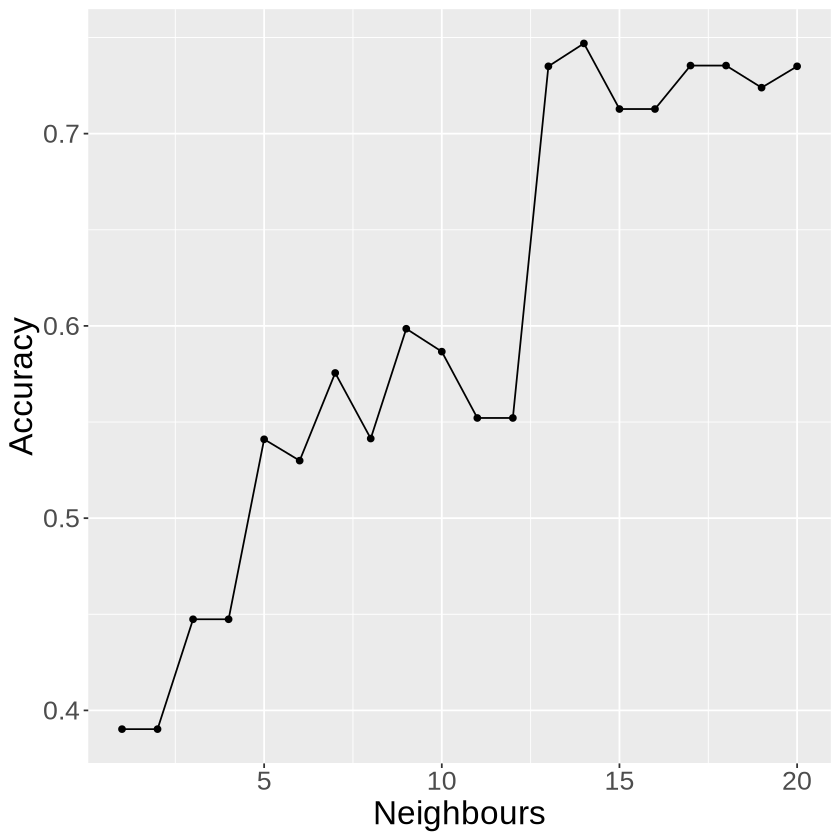

In [7]:
set.seed (1234)

## To treat subscribe as categorical variable
game_data <- game_data |>
        mutate(subscribe = as_factor(subscribe))

## Splitting data into 75% training and 25% testing
game_split <- initial_split(game_data, prop = 0.75, strata = subscribe)  
game_train <- training(game_split)   
game_test <- testing(game_split)

## Game recipe
game_recipe <- recipe(subscribe ~ played_hours + Age, data = game_train) 

## Using spec with tuning k-neighbour 
game_spec <- nearest_neighbor (weight_func = "rectangular", neighbors = tune ()) |>
    set_engine ("kknn") |>
    set_mode ("classification")

## Cross validation (5-fold)
game_vfold <- vfold_cv(game_train, v = 5, strata = subscribe)
k_vals <- tibble (neighbors = seq (from = 1, to = 20))

game_fit <- workflow () |>
    add_recipe (game_recipe) |>
    add_model (game_spec) |>
    tune_grid (resamples = game_vfold, grid = k_vals) 

##  Game metrics for accuracy
game_metrics <- game_fit |>
    collect_metrics () |>
    filter(.metric == "accuracy") |> 
    mutate(neighbors = as.double(neighbors))
game_metrics

## PLOT + HAVE TO ADD LEGEND
cross_val_plot <- ggplot (game_metrics, aes (x = neighbors, y = mean)) +
    geom_point () +
    geom_line () +
    labs (x = "Neighbours", y = "Accuracy") + 
    theme (text = element_text (size = 20))
cross_val_plot



From the graph above, we can conclude that K = 14 has the highest accuracy. Adding this to our spec and scaling all predictors:

In [4]:
## Using spec with the k-neighbour with the highest accuracy
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 14) |> 
      set_engine("kknn") |>
      set_mode("classification")

## Recipe with scaling for played_hours and age
minecraft_recipe <- recipe(subscribe ~ played_hours + Age, data = game_train) |>
                       step_scale (all_predictors()) |>
                       step_center (all_predictors())

## Fitted model
minecraft_fit <- workflow() |>
         add_recipe (minecraft_recipe) |>
         add_model  (knn_spec) |>
         fit(data = game_data)


Finding the accuracy and confusion matrix to our model:

In [15]:
set.seed(1234) 

## Prediction with testing data
minecraft_predictions <- predict(minecraft_fit, game_test) |>
    bind_cols(game_test)

## To find accuracy %
minecraft_metrics <- minecraft_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter (.metric == "accuracy")
minecraft_metrics

## Confusion matrix for algorithm
minecraft_conf_mat <- minecraft_predictions |> 
     conf_mat(truth = subscribe, estimate = .pred_class)  
minecraft_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857


          Truth
Prediction FALSE TRUE
     FALSE     0    1
     TRUE     13   35

From the above results, the accuracy is found to be 71.42%. We can also find the precision and recall using the confusion matrix above with the equations... and .... 

<font size="5"> Discussion </font> 

- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?


to-do: 
- add background information
- standardize data
- figure out which k-nearest neighbours is best for this classification problem
- tuning, splitting into training + testing data
- finding accuracy/precision/recall
- discussion